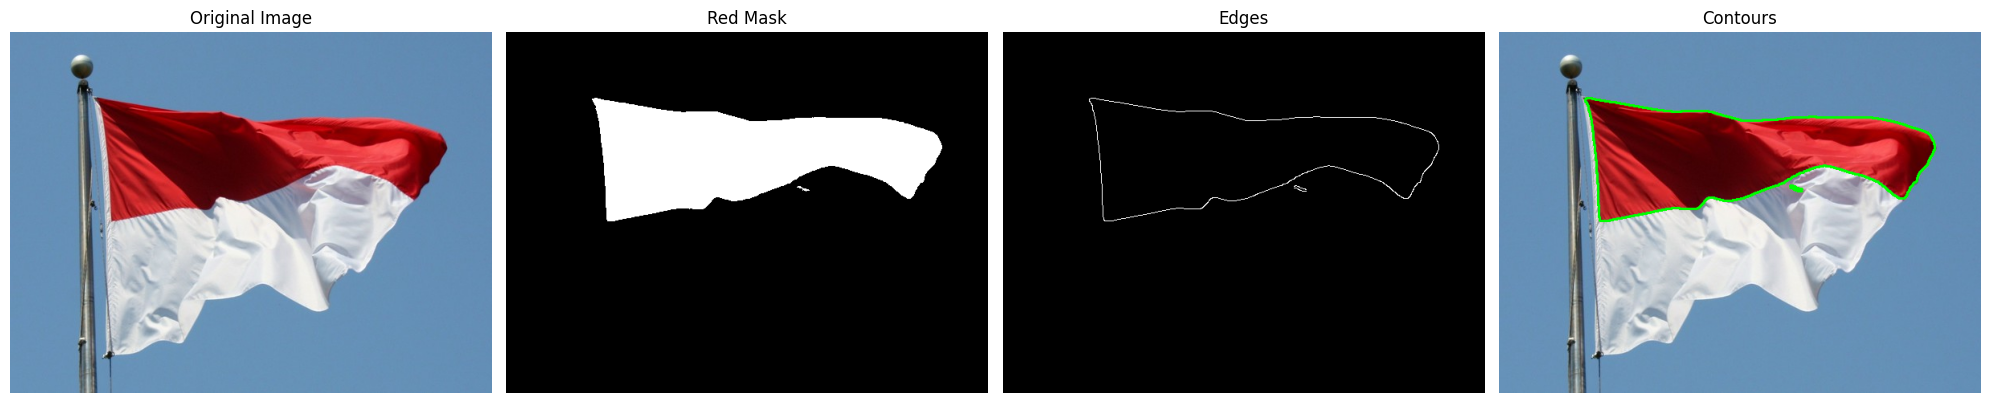

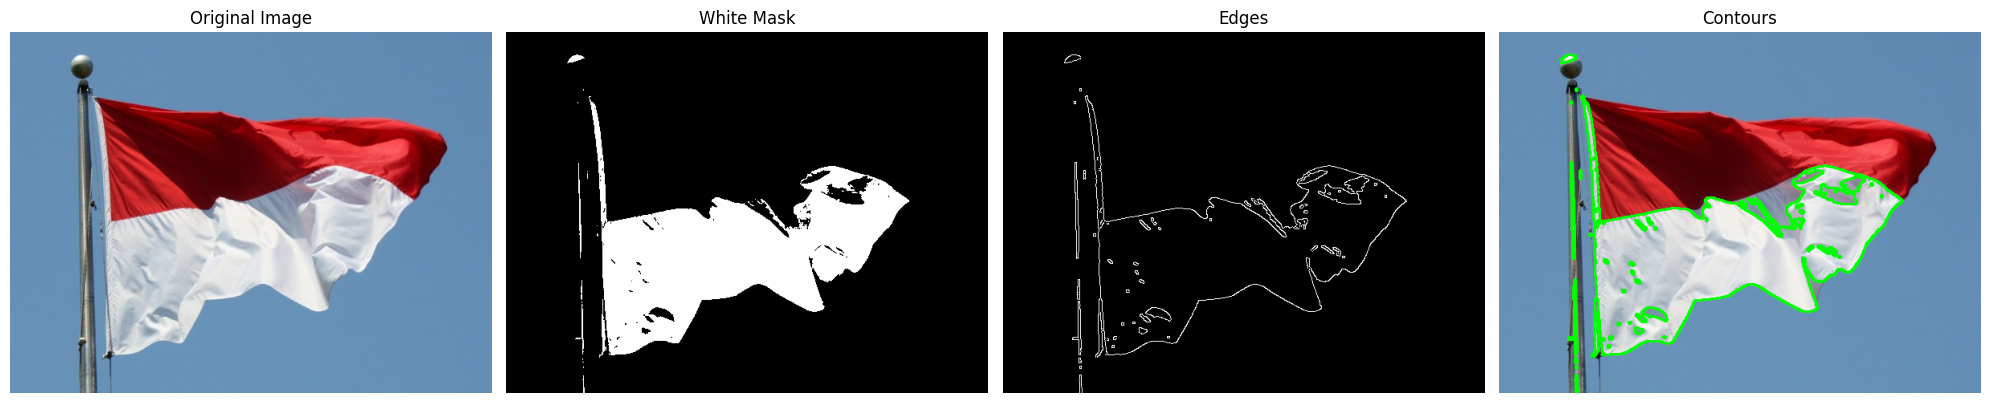

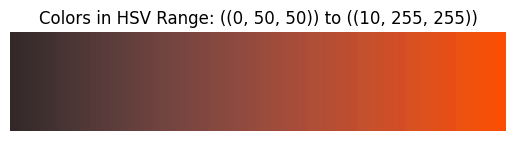

Indonesia


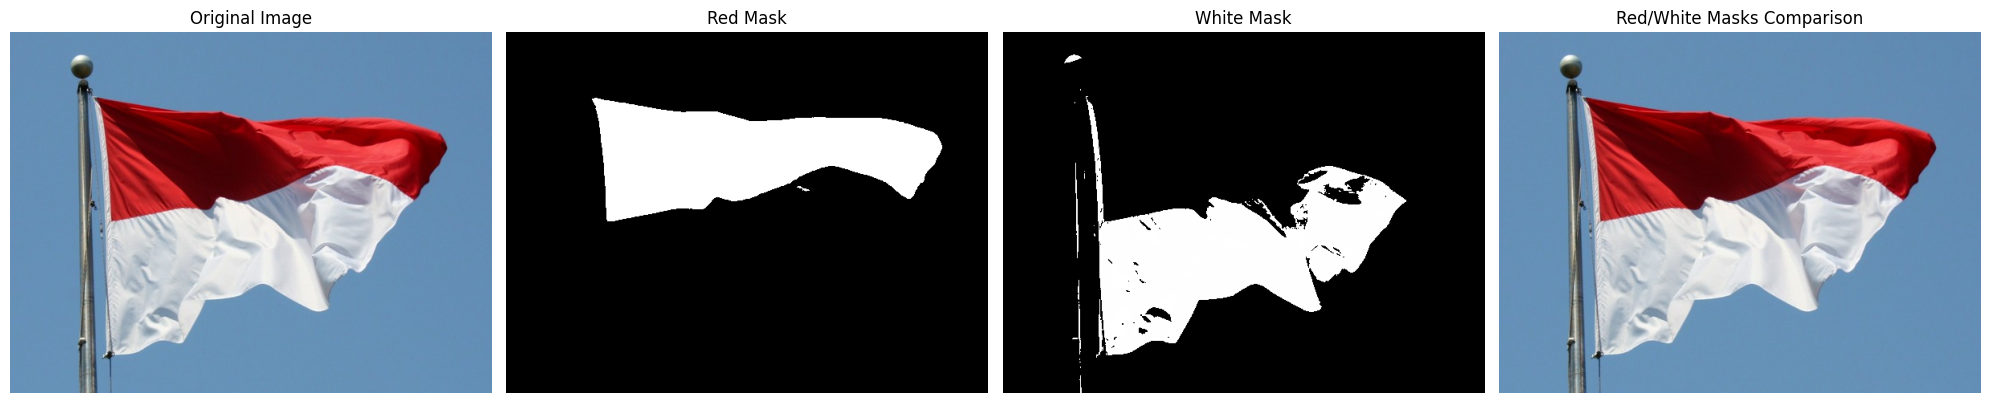

Indonesia


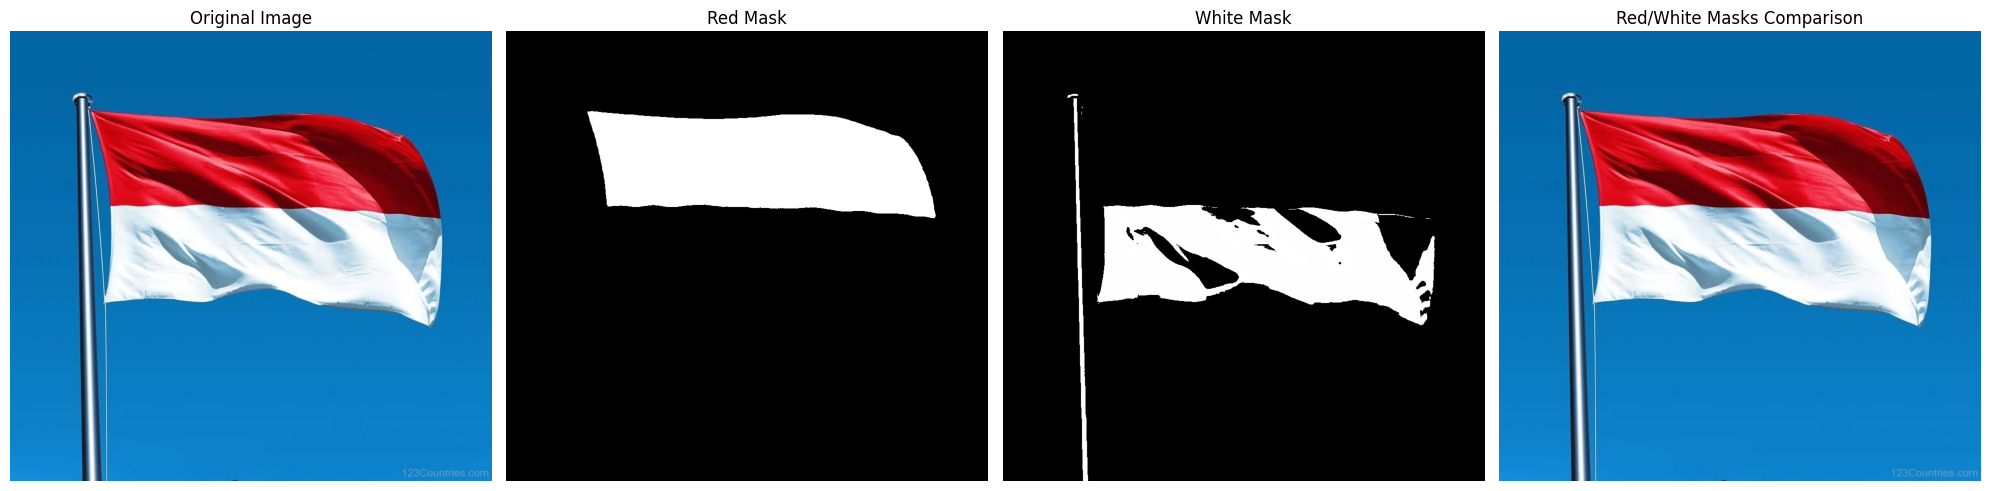

Indonesia


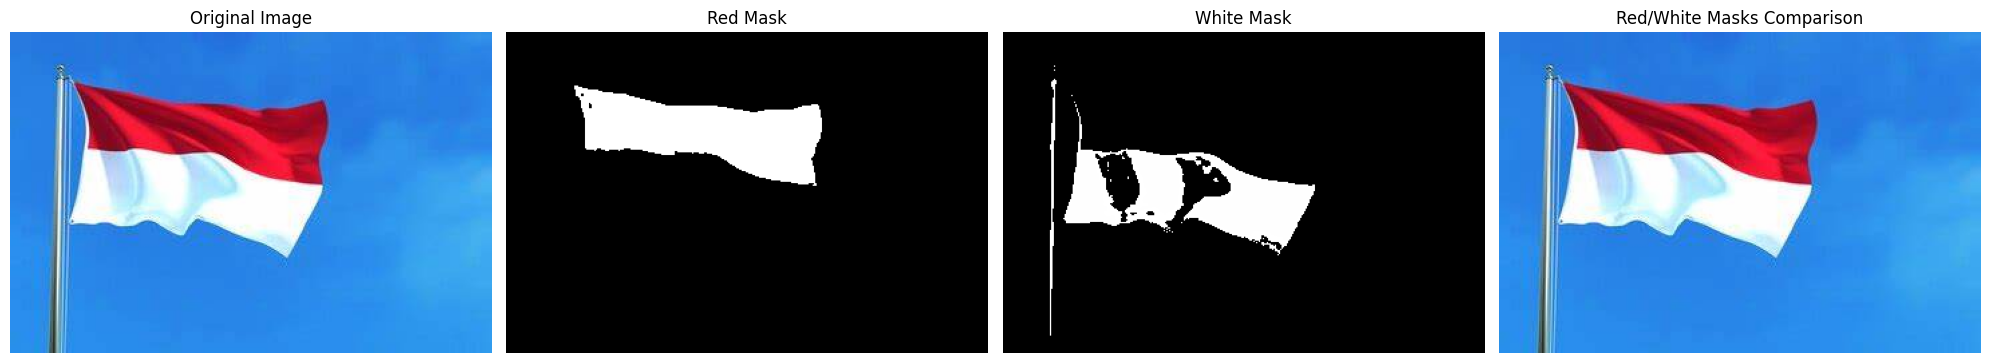

Poland


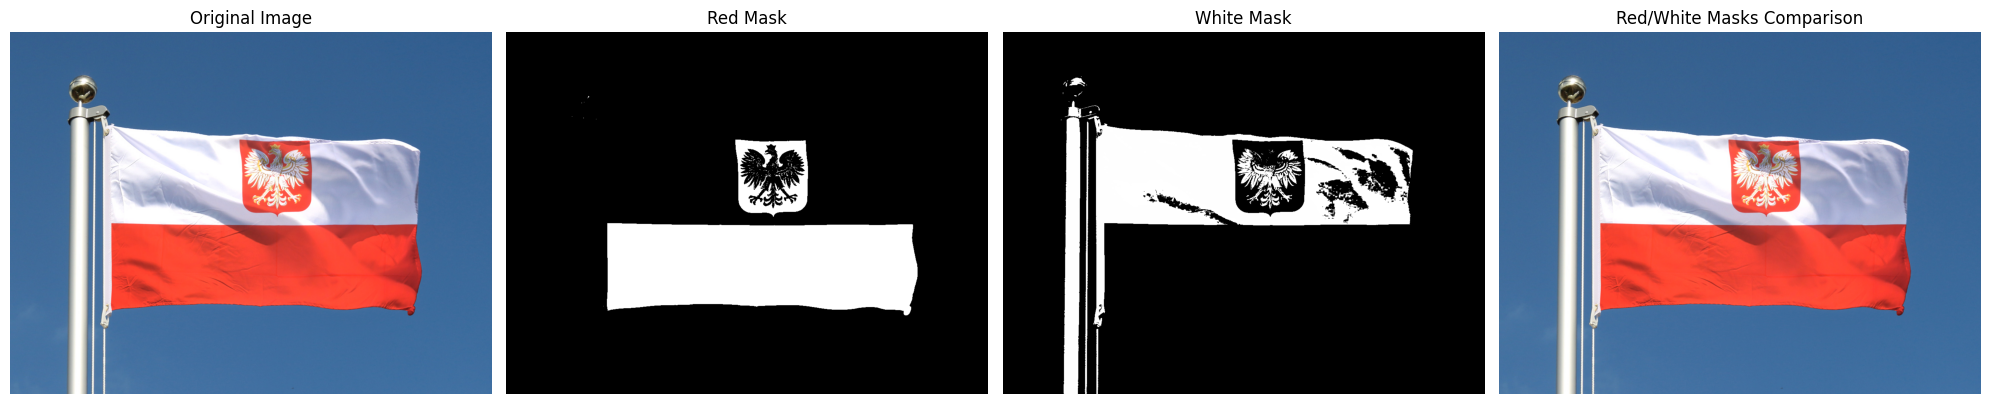

Poland


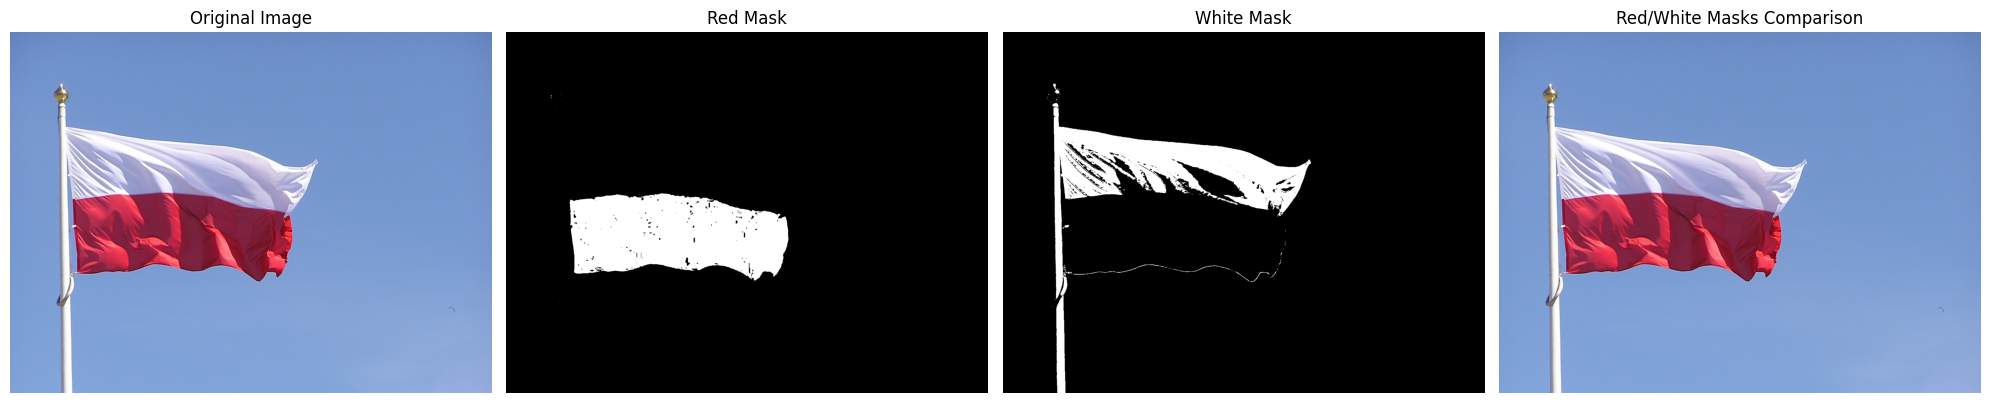

Poland


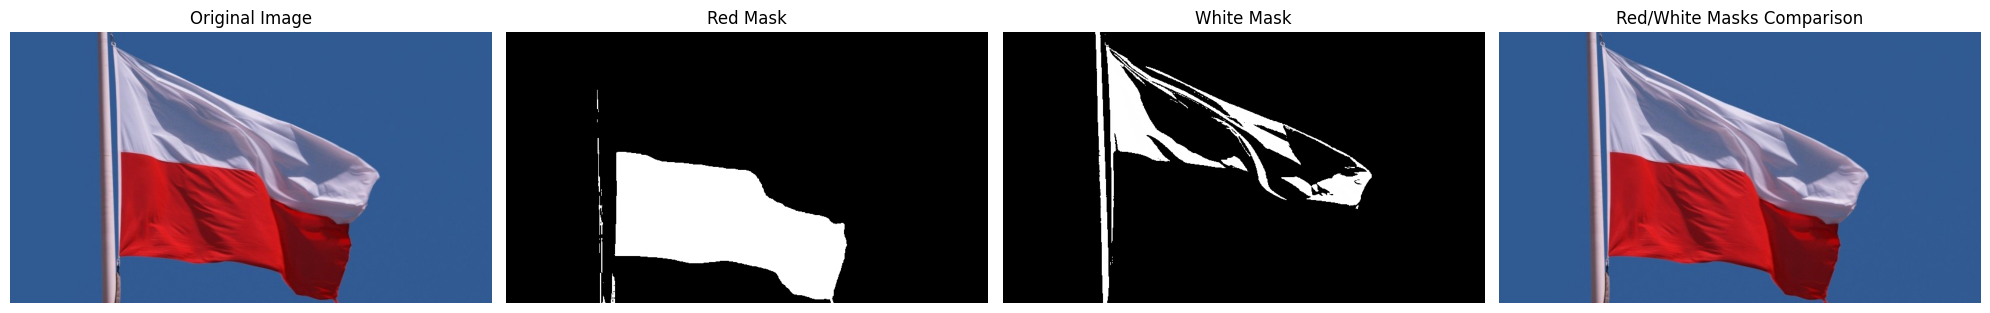

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_paths = ['i1.jpg', 'i2.jpg', 'i3.jpeg', 'p1.jpg', 'p2.jpg', 'p3.jpg']  # Define your image paths here

# Function to find closed curves of red pixels
def red_edges(image_path, red_ranges):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found!")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mask = np.zeros(hsv_image.shape[:2], dtype=np.uint8)
    for lower_red, upper_red in red_ranges:
        mask += cv2.inRange(hsv_image, lower_red, upper_red)

    mask_blur = cv2.GaussianBlur(mask, (5, 5), 0)
    edges = cv2.Canny(mask_blur, 50, 150)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    result_image = image_rgb.copy()
    cv2.drawContours(result_image, contours, -1, (0, 255, 0), 2)

    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].imshow(image_rgb)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title('Red Mask')
    ax[1].axis('off')

    ax[2].imshow(edges, cmap='gray')
    ax[2].set_title('Edges')
    ax[2].axis('off')

    ax[3].imshow(result_image)
    ax[3].set_title('Contours')
    ax[3].axis('off')

    plt.tight_layout()
    plt.show()

    return contours

red_ranges = [
    (np.array([0, 50, 50], dtype=np.uint8), np.array([10, 255, 255], dtype=np.uint8)),
    (np.array([170, 50, 50], dtype=np.uint8), np.array([180, 255, 255], dtype=np.uint8))
]

# Function to find closed curves of white pixels
def white_edges(image_path, white_ranges):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found!")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mask = np.zeros(hsv_image.shape[:2], dtype=np.uint8)
    for lower_white, upper_white in white_ranges:
        mask += cv2.inRange(hsv_image, lower_white, upper_white)

    mask_blur = cv2.GaussianBlur(mask, (5, 5), 0)
    edges = cv2.Canny(mask_blur, 50, 150)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    result_image = image_rgb.copy()
    cv2.drawContours(result_image, contours, -1, (0, 255, 0), 2)

    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].imshow(image_rgb)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title('White Mask')
    ax[1].axis('off')

    ax[2].imshow(edges, cmap='gray')
    ax[2].set_title('Edges')
    ax[2].axis('off')

    ax[3].imshow(result_image)
    ax[3].set_title('Contours')
    ax[3].axis('off')

    plt.tight_layout()
    plt.show()

white_ranges = [
    (np.array([0, 0, 200], dtype=np.uint8), np.array([180, 30, 255], dtype=np.uint8)),
    (np.array([0, 0, 180], dtype=np.uint8), np.array([180, 55, 255], dtype=np.uint8))
]

image_path = 'i1.jpg'
red_edges(image_path, red_ranges)
white_edges(image_path, white_ranges)

def show_colors_in_hsv_range(lower_hsv, upper_hsv, width=500, height=100):
    img = np.zeros((height, width, 3), dtype=np.uint8)

    for i in range(width):
        h = lower_hsv[0] + (upper_hsv[0] - lower_hsv[0]) * i / width
        s = lower_hsv[1] + (upper_hsv[1] - lower_hsv[1]) * i / width
        v = lower_hsv[2] + (upper_hsv[2] - lower_hsv[2]) * i / width
        bgr_color = cv2.cvtColor(np.uint8([[[h, s, v]]]), cv2.COLOR_HSV2BGR)
        img[:, i] = bgr_color[0][0]

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f'Colors in HSV Range: ({lower_hsv}) to ({upper_hsv})')
    plt.show()

lower_hsv = (0, 50, 50)
upper_hsv = (10, 255, 255)
show_colors_in_hsv_range(lower_hsv, upper_hsv)

def detect_red_edges(image, red_ranges):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = np.zeros(hsv_image.shape[:2], dtype=np.uint8)
    for lower_red, upper_red in red_ranges:
        mask += cv2.inRange(hsv_image, lower_red, upper_red)
    return mask

def detect_white_edges(image, white_ranges):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = np.zeros(hsv_image.shape[:2], dtype=np.uint8)
    for lower_white, upper_white in white_ranges:
        mask += cv2.inRange(hsv_image, lower_white, upper_white)
    return mask

def compare_red_and_white(image_path, red_ranges, white_ranges):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found!")
        return

    red_mask = detect_red_edges(image, red_ranges)
    white_mask = detect_white_edges(image, white_ranges)

    red_y_coords = np.where(red_mask > 0)
    white_y_coords = np.where(white_mask > 0)

    red_avg_y = np.mean(red_y_coords[0]) if red_y_coords[0].size > 0 else float('inf')
    white_avg_y = np.mean(white_y_coords[0]) if white_y_coords[0].size > 0 else float('-inf')

    if white_avg_y < red_avg_y:
        print("Poland")
    else:
        print("Indonesia")

    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(red_mask, cmap='gray')
    ax[1].set_title('Red Mask')
    ax[1].axis('off')

    ax[2].imshow(white_mask, cmap='gray')
    ax[2].set_title('White Mask')
    ax[2].axis('off')

    ax[3].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[3].set_title('Red/White Masks Comparison')
    ax[3].axis('off')

    plt.tight_layout()
    plt.show()

red_ranges = [
    (np.array([0, 50, 50], dtype=np.uint8), np.array([10, 255, 255], dtype=np.uint8)),
    (np.array([170, 50, 50], dtype=np.uint8), np.array([180, 255, 255], dtype=np.uint8))
]
white_ranges = [
    (np.array([0, 0, 200], dtype=np.uint8), np.array([180, 30, 255], dtype=np.uint8)),
    (np.array([0, 0, 180], dtype=np.uint8), np.array([180, 55, 255], dtype=np.uint8))
]

for image_path in image_paths:
    compare_red_and_white(image_path, red_ranges, white_ranges)
